# Heart Failure Prediction Dataset
11 clinical features for predicting heart disease events.

## About Dataset
Similar Datasets
* Hepatitis C Dataset: LINK
* Body Fat Prediction Dataset: LINK
* Cirrhosis Prediction Dataset: LINK
* Stroke Prediction Dataset: LINK
* Stellar Classification Dataset - SDSS17: LINK
* Wind Speed Prediction Dataset: LINK
* Spanish Wine Quality Dataset: LINK
## Context
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Attribute Information
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]
## Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations
* Total: 1190 observations
* Duplicated: 272 observations

* Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

Acknowledgements
## Creators:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# The First things Imports the moduls and getting the dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( 'ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

data = pd.read_csv(r"C:\Users\islam\OneDrive\Desktop\Work File\Machine Learning\Heart Failure Prediction Classification\archive (1)\heart.csv")
data.head(11)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## The Types of datasets is a Classification Due to we should be classifier HeartDisease yes (1) of No (0)

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


We will see in this descriptive statistics that the average age of referrals recorded in the data is 53 years, the average incidence of heart disease is yes, the highest age is 77, the lowest age is 28 years, and the standard deviation here is 9.5.

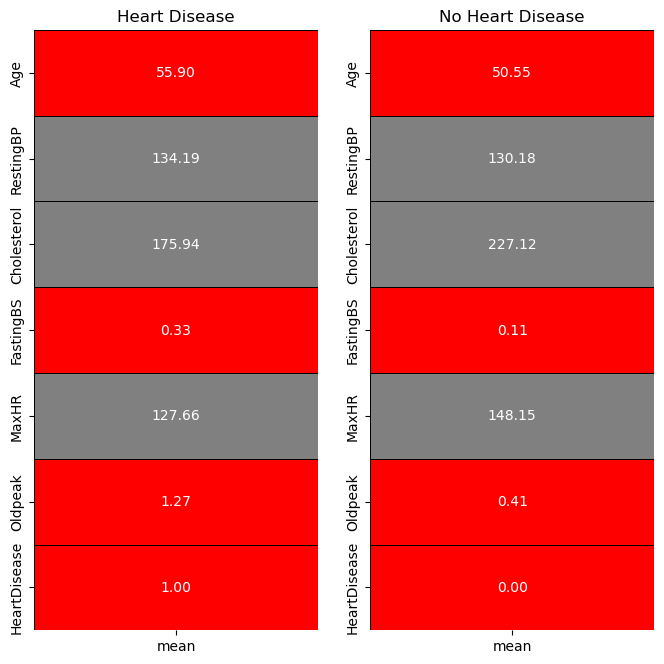

In [4]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['red','gray']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (7,7))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)



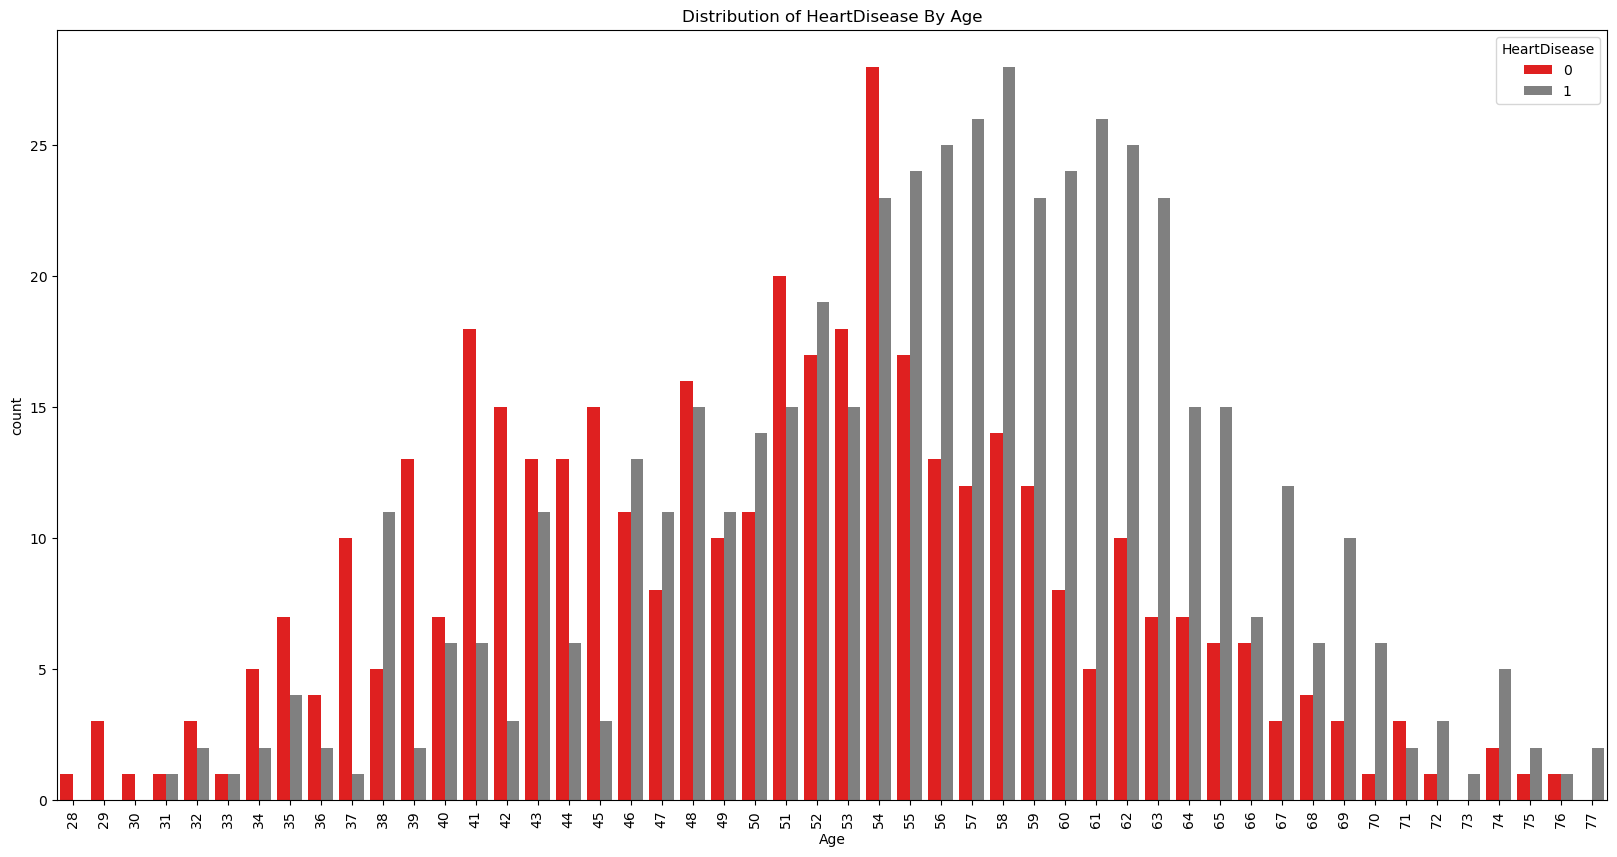

In [5]:
plt.figure(figsize=(20, 10))
sns.countplot(x = data['Age'] , hue=data['HeartDisease'], palette=['red', 'gray'])  # Apply colors
plt.title('Distribution of HeartDisease By Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

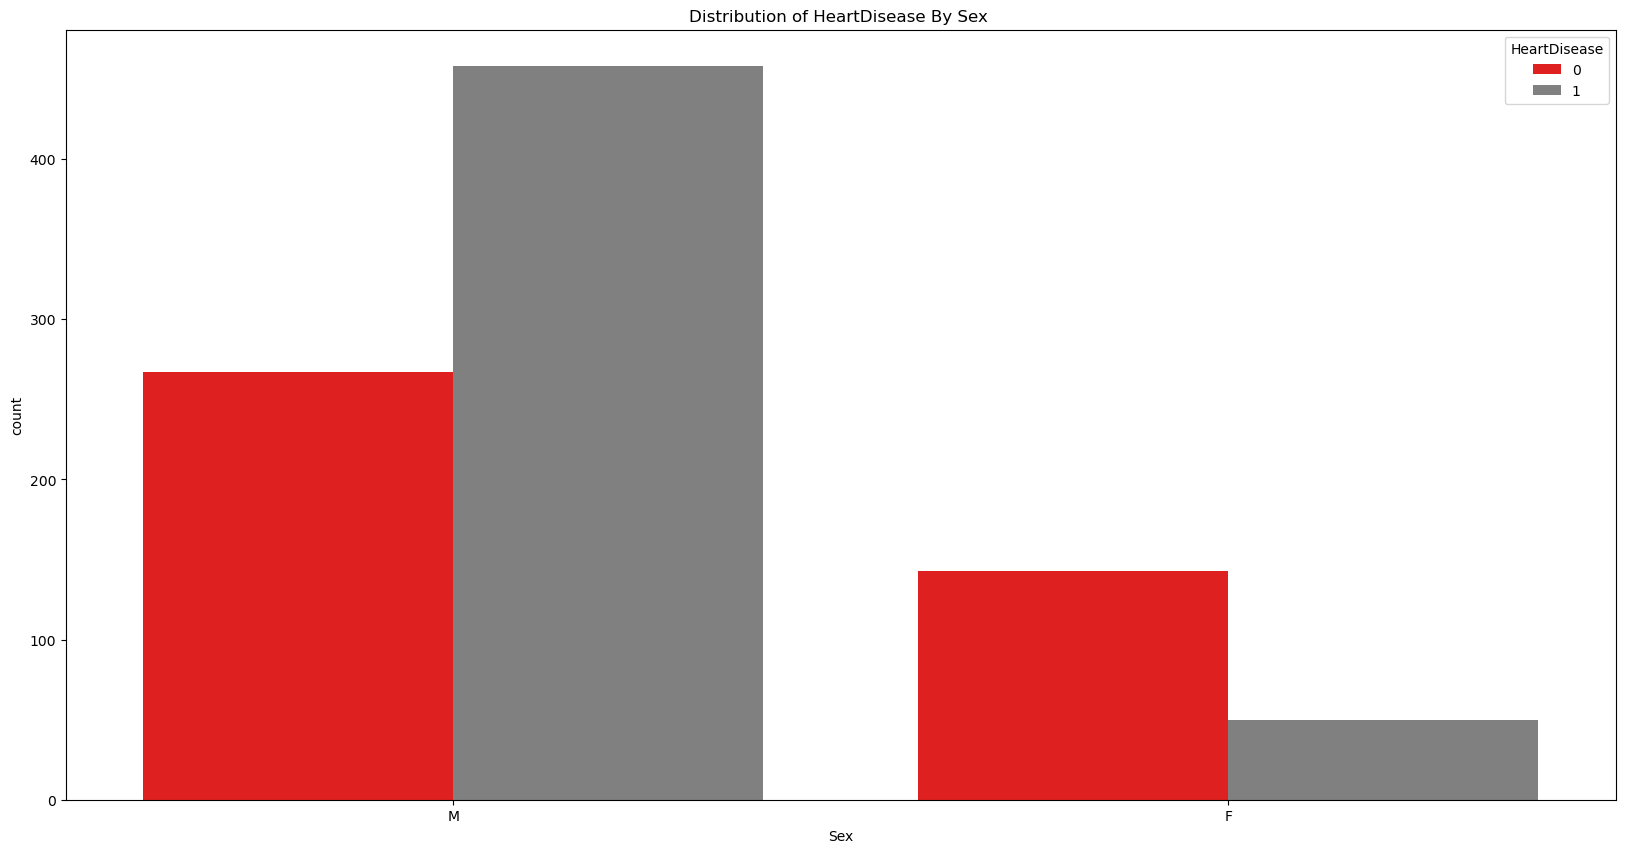

In [6]:
#Distribution of HeartDisease By Sex
plt.figure(figsize=(20, 10))
sns.countplot(x = data['Sex'] , hue=data['HeartDisease'], palette=['red', 'gray'])
plt.title('Distribution of HeartDisease By Sex ')
plt.show()

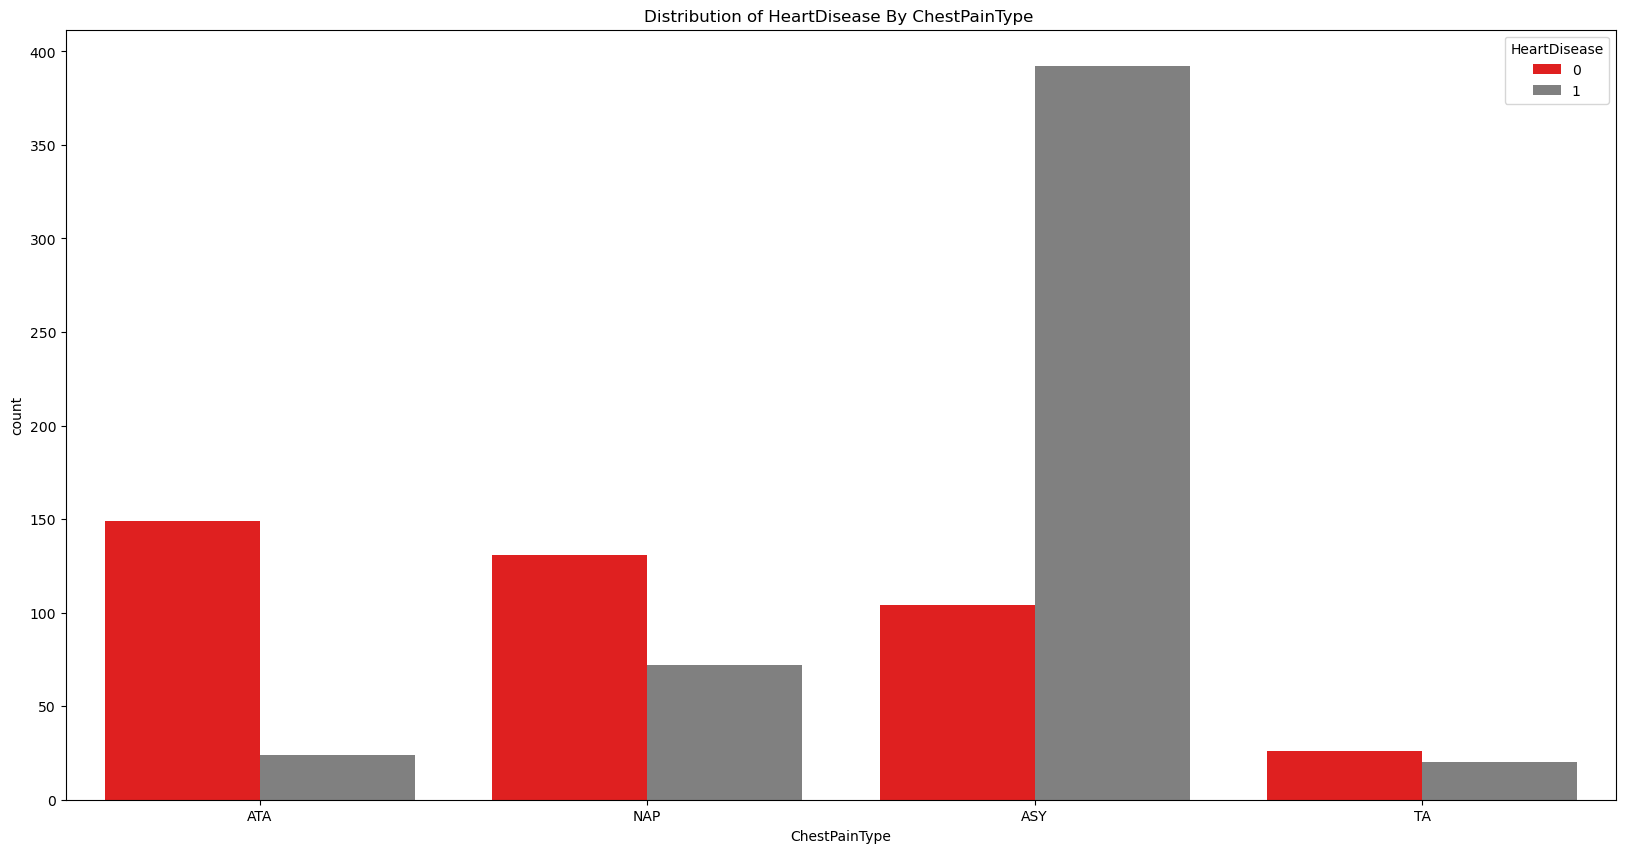

In [7]:
#Distribution of HeartDisease By ChestPainType
plt.figure(figsize=(20, 10))
sns.countplot(x = data['ChestPainType'] , hue=data['HeartDisease'], palette=['red', 'gray'])
plt.title('Distribution of HeartDisease By ChestPainType ')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

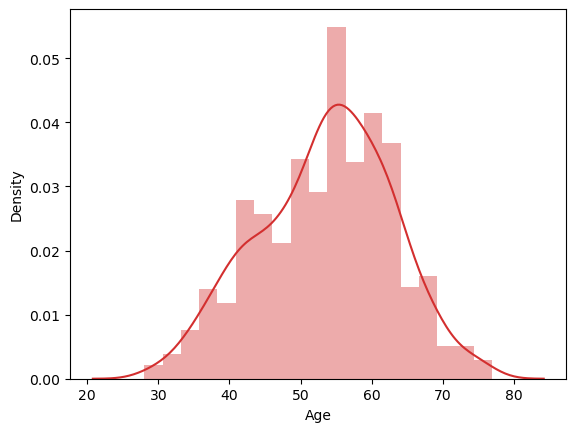

In [8]:
sns.distplot(data['Age'],color='#d32f2f')

## A kurtosis of 0 indicates that a distribution is mesokurtic. This means that the distribution has a normal shape, with a peak in the center and tails that fall off evenly on either side.

A normal distribution has a kurtosis of 0, so any distribution with a kurtosis of approximately 0 is also mesokurtic. Mesokurtic distributions are relatively common, and they can be found in many different areas of science and engineering.

Here are some examples of mesokurtic distributions:

* The distribution of human heights
* The distribution of IQ scores
* The distribution of error terms in a statistical model
* The distribution of stock prices
* Mesokurtic distributions are often used as a benchmark in statistical analysis. For example, if you are developing a new statistical model, you can compare the kurtosis of the model's predictions to the kurtosis of a mesokurtic distribution. This can help you to assess the accuracy of the model.

If a distribution has a kurtosis that is different from 0, it is called a leptokurtic or a platykurtic distribution. A leptokurtic distribution has a higher kurtosis than 0, which means that it has a sharper peak and heavier tails. A platykurtic distribution has a lower kurtosis than 0, which means that it has a flatter peak and lighter tails.

Leptokurtic and platykurtic distributions can be found in many different areas of science and engineering. For example, a leptokurtic distribution could be used to model the distribution of income levels in a population, while a platykurtic distribution could be used to model the distribution of the number of defects in a product.

Kurtosis is an important statistical measure that can be used to describe the shape of a distribution. A kurtosis of 0 indicates that a distribution is mesokurtic, which means that it has a normal shape. Mesokurtic distributions are relatively common, and they can be found in many different areas of science and engineering.



<Figure size 1500x1000 with 0 Axes>

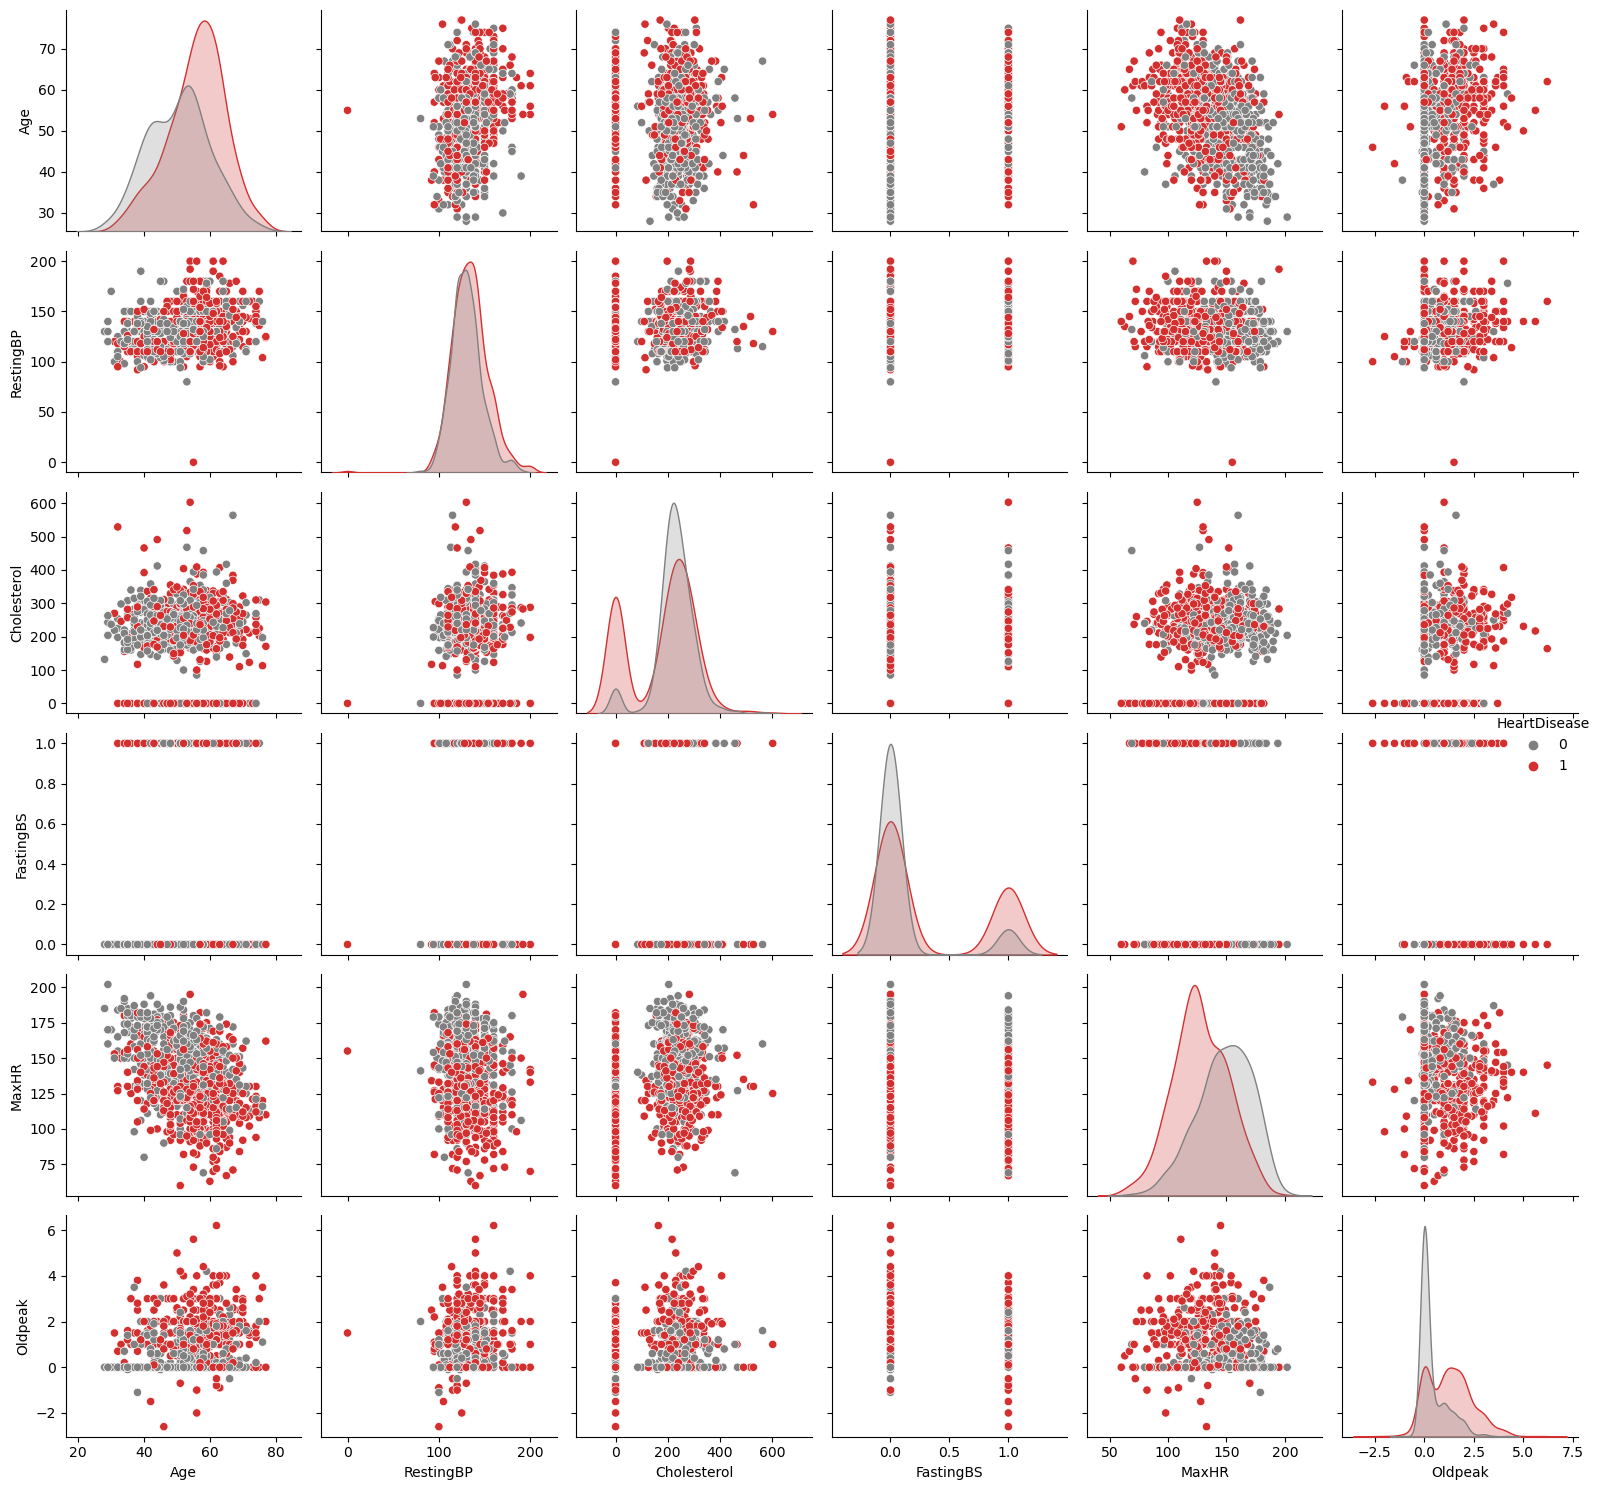

In [9]:
my_color = '#d32f2f'  
plt.figure(figsize=(15, 10))

sns.pairplot(data, hue="HeartDisease", palette={0: 'gray', 1: my_color}, diag_kws={'color': my_color})

plt.tight_layout()

plt.show()

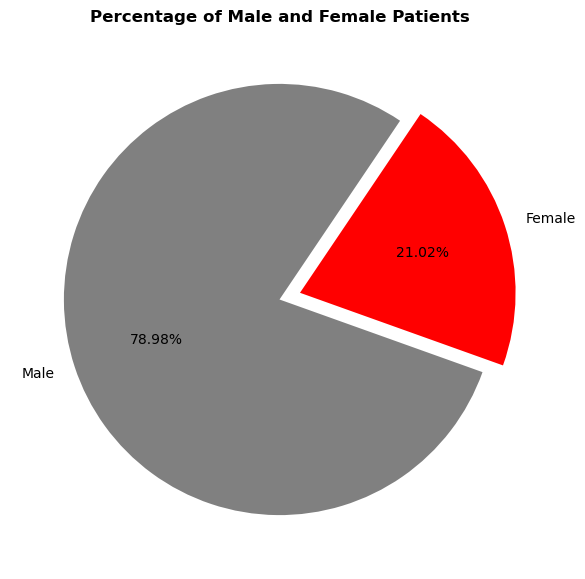

In [10]:
plt.figure(figsize=(10, 7))
plt.title("Percentage of Male and Female Patients", fontweight="bold")

# Explode the 'female' slice
explode = (0, 0.1)

values = data["Sex"].value_counts()
plt.pie(values, labels=["Male", "Female"], explode=explode, autopct="%.2f%%", startangle=56, colors=['gray', 'red'])
plt.show()


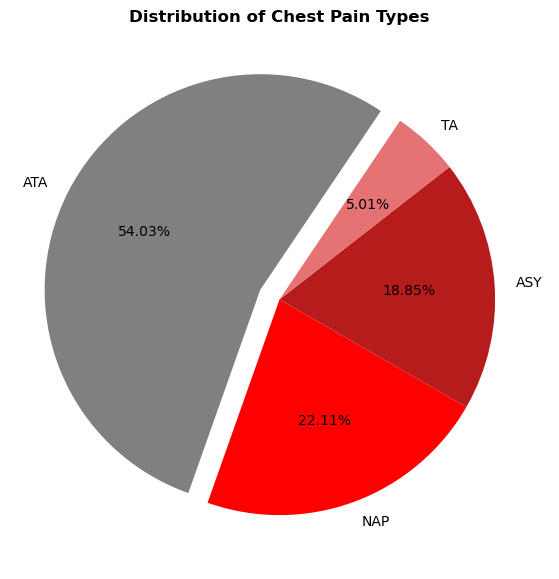

In [11]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of Chest Pain Types", fontweight="bold")

explode = (0.1, 0, 0, 0)  # Adjust the explode values based on the number of unique values

values = data["ChestPainType"].value_counts()
plt.pie(values, labels=["ATA", "NAP", "ASY", "TA"], explode=explode, autopct="%.2f%%", startangle=56, colors=['gray', 'red', '#b71c1c', '#e57373'])
plt.show()


## Make Sure the datasets dont have any nulls

In [12]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
#categrical values  Sex      
sex=data['Sex'].value_counts()
print('categrical values :-')
print('1- sex vaiues:\n' ,sex)
print('='*20)


#categrical values ChestPainType    
ChestPainType=data['ChestPainType'].value_counts()
print('2- ChestPainType vaiues:\n' ,ChestPainType)
print('='*20)


#categrical values RestingECG     
RestingECG=data['RestingECG'].value_counts()
print('3- RestingECG vaiues:\n' ,RestingECG)
print('='*20)


#categrical values ExerciseAngina     
ExerciseAngina=data['ExerciseAngina'].value_counts()
print('4- ExerciseAngina vaiues:\n' ,ExerciseAngina)
print('='*20)

#categrical values ST_Slope     
ST_Slope=data['ST_Slope'].value_counts()
print('5- ST_Slope vaiues:\n' ,ST_Slope)


categrical values :-
1- sex vaiues:
 Sex
M    725
F    193
Name: count, dtype: int64
2- ChestPainType vaiues:
 ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
3- RestingECG vaiues:
 RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
4- ExerciseAngina vaiues:
 ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
5- ST_Slope vaiues:
 ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


## The data must be converted into numerical numbers in order to prepare it to enter the model creation stage

# Feature Engineering

In [14]:
#Transform Data
data.replace({'Sex':{"M":1,"F":0}},inplace=True)
data.replace({'ExerciseAngina':{"N":1,"Y":0}},inplace=True)
data.replace({'ST_Slope':{"Up":1,"Down":0,'Flat':2}},inplace=True)
data.replace({'RestingECG':{"Normal":1,"LVH":0,'ST':2}},inplace=True)
data.replace({'ChestPainType':{"ATA":1,"NAP":2,'ASY':3,'TA':4}},inplace=True)
data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,1,0.0,1,0
1,49,0,2,160,180,0,1,156,1,1.0,2,1
2,37,1,1,130,283,0,2,98,1,0.0,1,0
3,48,0,3,138,214,0,1,108,0,1.5,2,1
4,54,1,2,150,195,0,1,122,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,4,110,264,0,1,132,1,1.2,2,1
914,68,1,3,144,193,1,1,141,1,3.4,2,1
915,57,1,3,130,131,0,1,115,0,1.2,2,1
916,57,0,1,130,236,0,0,174,1,0.0,2,1


<Axes: >

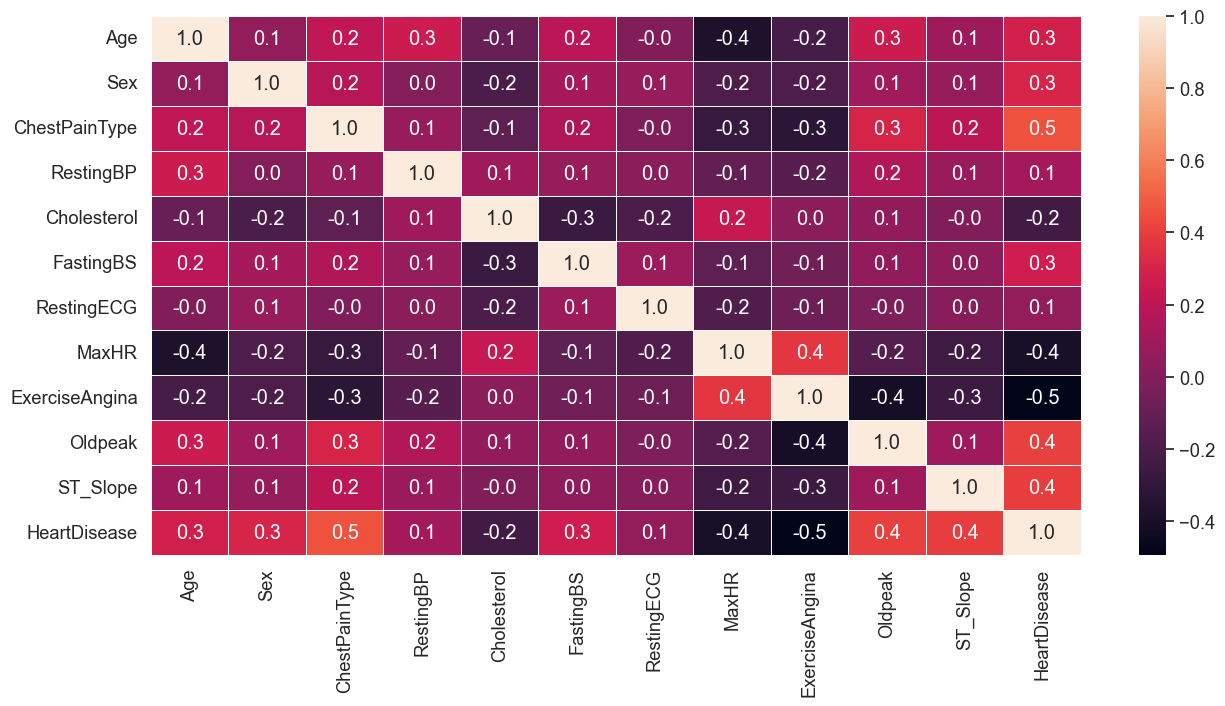

In [15]:
sns.set(rc={'figure.figsize':[15,7]},font_scale=1.2)
sns.heatmap(data.corr(),annot=True,fmt='.1f',linewidths=.5,color='red')

# Creat The Model
The First spliting the data to training part and testing 

In [16]:
x=data.drop(['HeartDisease'],axis=1)
y=data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.8, random_state=42)

[[231 157]
 [ 88 259]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       388
           1       0.62      0.75      0.68       347

    accuracy                           0.67       735
   macro avg       0.67      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



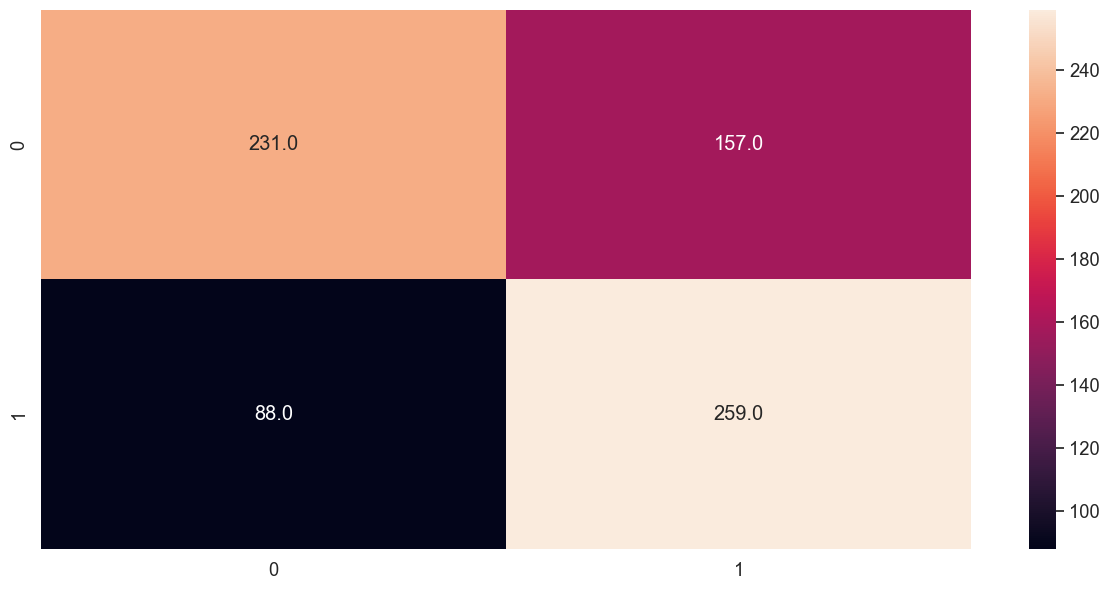

In [17]:
# K-NN Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model1=KNeighborsClassifier()
all(model1)    

[[278  70]
 [ 41 346]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       348
           1       0.83      0.89      0.86       387

    accuracy                           0.85       735
   macro avg       0.85      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



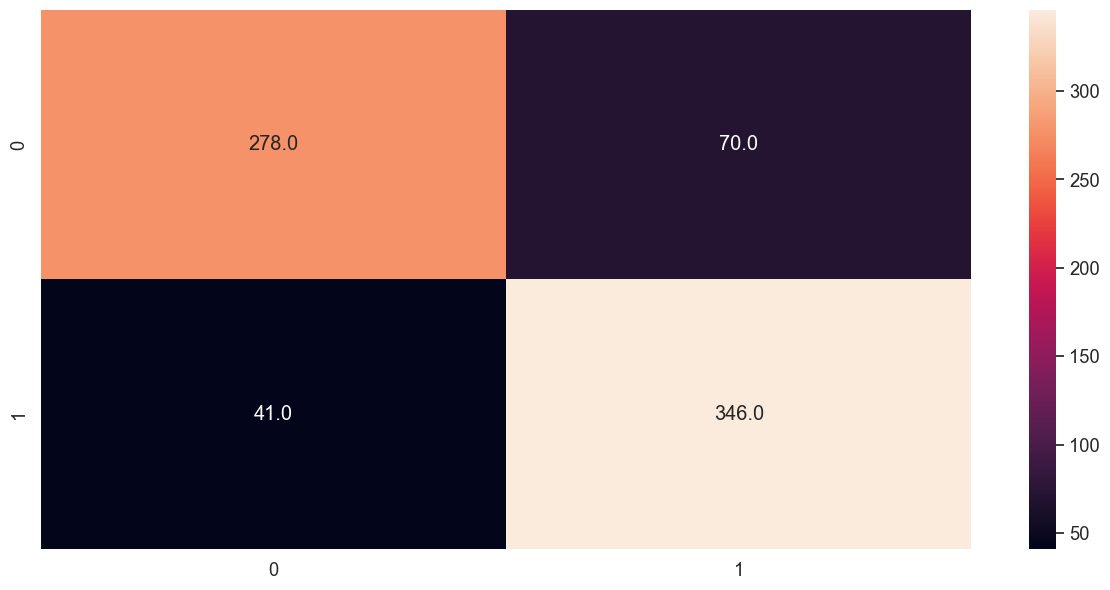

In [23]:
# SVM Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f',color='#d32f2f')
model2=SVC()
all(model1)   

[[231 157]
 [ 88 259]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       388
           1       0.62      0.75      0.68       347

    accuracy                           0.67       735
   macro avg       0.67      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



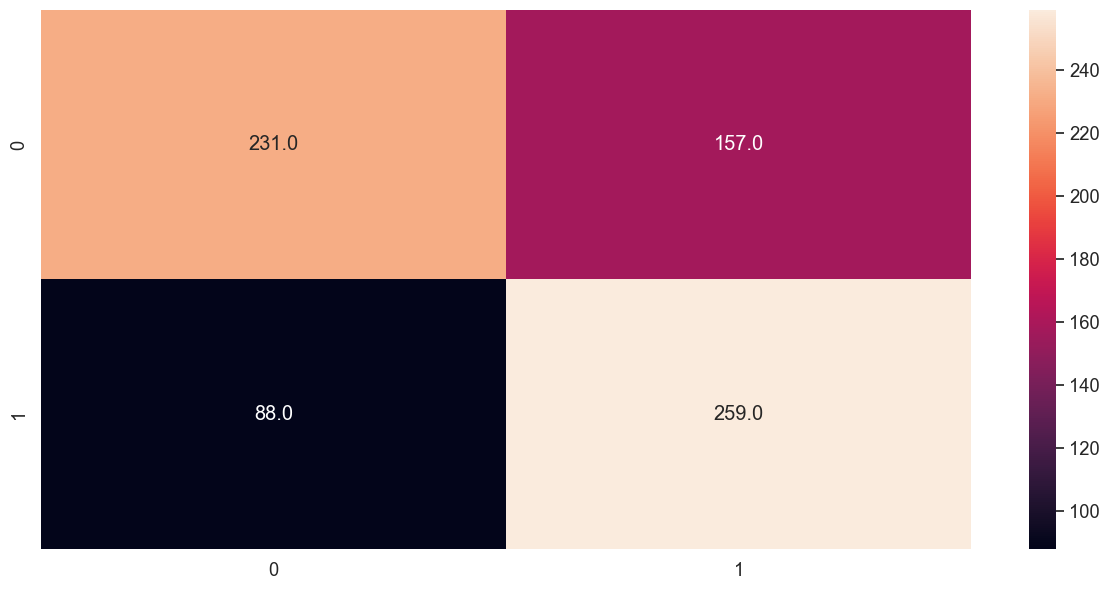

In [19]:
#DecisionTree Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f') 
model3=DecisionTreeClassifier()
all(model1)  

[[231 157]
 [ 88 259]]
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       388
           1       0.62      0.75      0.68       347

    accuracy                           0.67       735
   macro avg       0.67      0.67      0.67       735
weighted avg       0.68      0.67      0.67       735



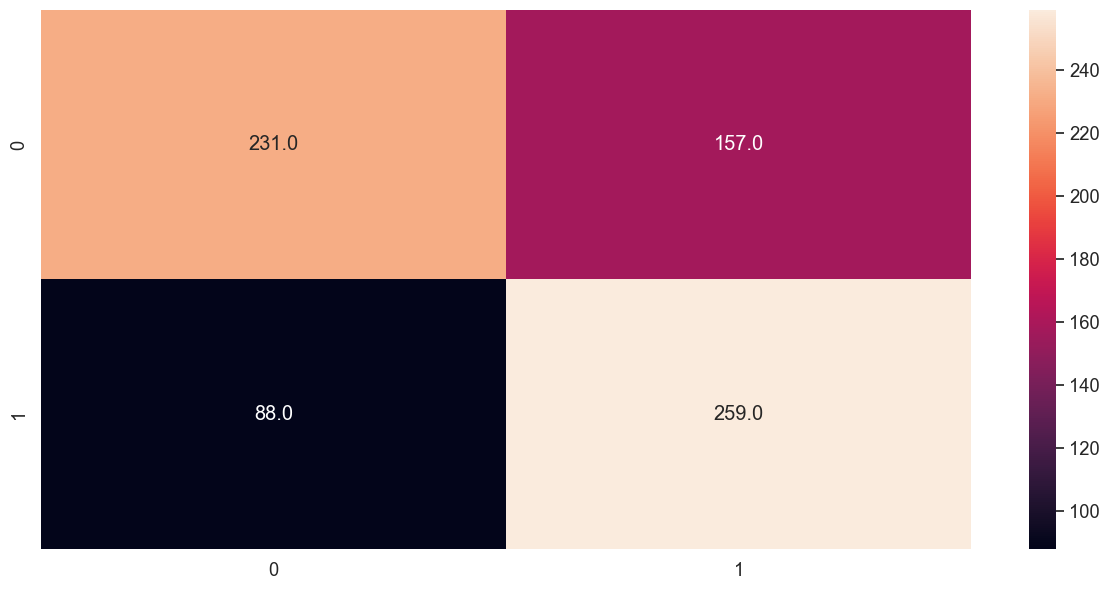

In [20]:
# RandomForest Algorithm
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model4=RandomForestClassifier()
all(model1)  

[[278  70]
 [ 41 346]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       348
           1       0.83      0.89      0.86       387

    accuracy                           0.85       735
   macro avg       0.85      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



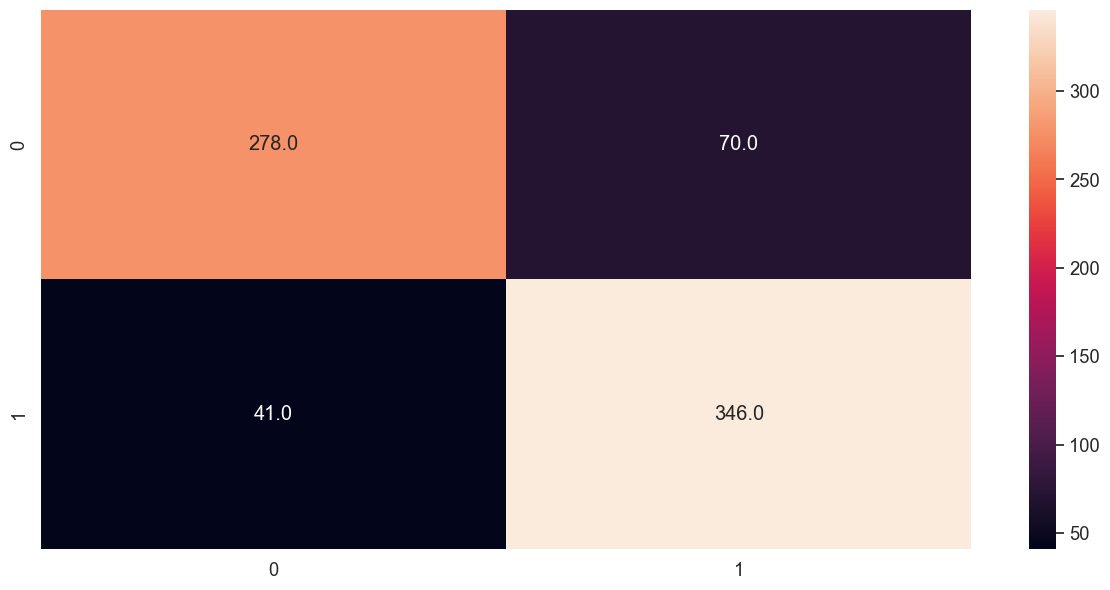

In [21]:
#GradientBoostingClassifier
def all(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True,fmt='.1f')
model1=GradientBoostingClassifier()
all(model1)    